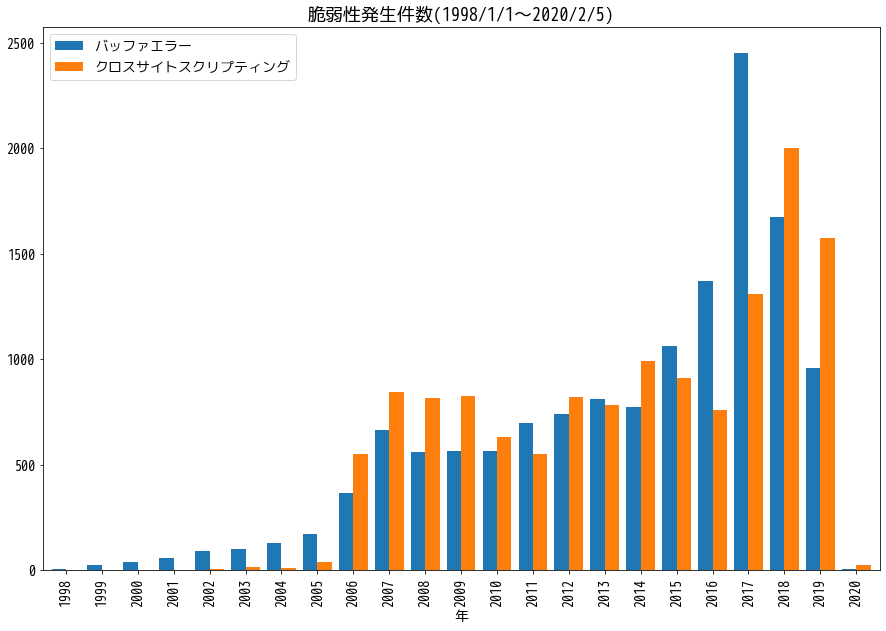

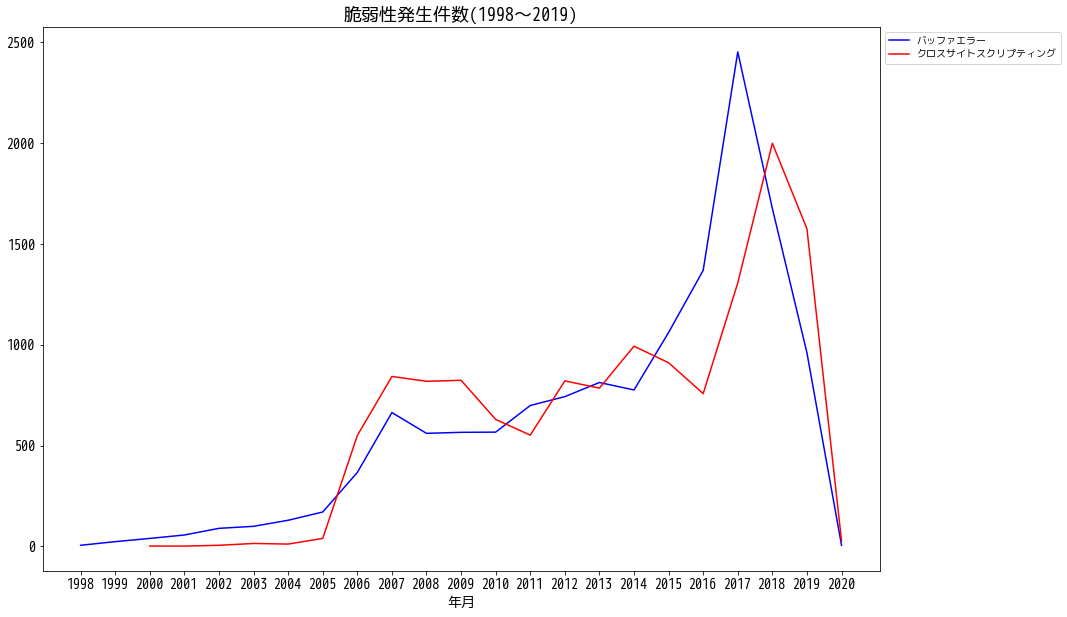

,cnt,icnt
yyyy,,
1998,6,0
1999,24,0
2000,40,2
2001,57,2
2002,90,6
2003,100,15
2004,130,12
2005,171,40
2006,367,550


In [1]:
%matplotlib inline
import matplotlib as ml
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2
from datetime import datetime
import numpy as np

font = {'family' : 'VL Gothic'}
ml.rc('font', **font)
plt.rcParams['figure.figsize'] = 15.0,10.0

connection_config = {
    'host':     'localhost',
    'port':     '15432',
    'database': 'jvn_db',
    'user':     'jvn',
    'password': 'jvn'
}

connection = psycopg2.connect(**connection_config)

sqlfmt = """
select to_char(public_date,'YYYY') as yyyy, to_char(public_date,'YYYY') as y, cweid, count(*) as cnt
from jvn_vulnerability
where cweid = '%s'
group by yyyy, cweid  order by yyyy,cweid;
"""
stmt = sqlfmt % ('CWE-119',)
rec = pd.read_sql(sql=stmt, con=connection, index_col='yyyy')

stmt = sqlfmt % ('CWE-79',)
cros_rec = pd.read_sql(sql=stmt, con=connection, index_col='yyyy')

rec['icnt'] = cros_rec['cnt']
df = rec[(rec['cnt'] > 0)]

########################################################################################
df.plot.bar(width=0.8)
plt.legend(['バッファエラー','クロスサイトスクリプティング'], fontsize=14)
plt.tick_params(labelsize=14)
plt.xlabel('年', fontsize=14)
t = datetime.now()
plt.title('脆弱性発生件数(1998/1/1〜%d/%d/%d)' % (t.year, t.month, t.day), fontsize=18)

########################################################################################
plt.figure()
plt.legend(['件数'], fontsize=14)
plt.tick_params(labelsize=14)
plt.xlabel('年月', fontsize=14)
t = datetime.now()
plt.title('脆弱性発生件数(1998〜%d)' % (t.year-1), fontsize=18)

plt.plot(rec['cnt'], color="blue",label='バッファエラー')
plt.plot(rec['icnt'], color="red",label='クロスサイトスクリプティング')
plt.legend(bbox_to_anchor=(1,1), loc=2)
########################################################################################

plt.show()
connection.close()
rec['icnt'] = rec['icnt'].fillna(0.0).astype(np.int64)
rec[['cnt', 'icnt']]

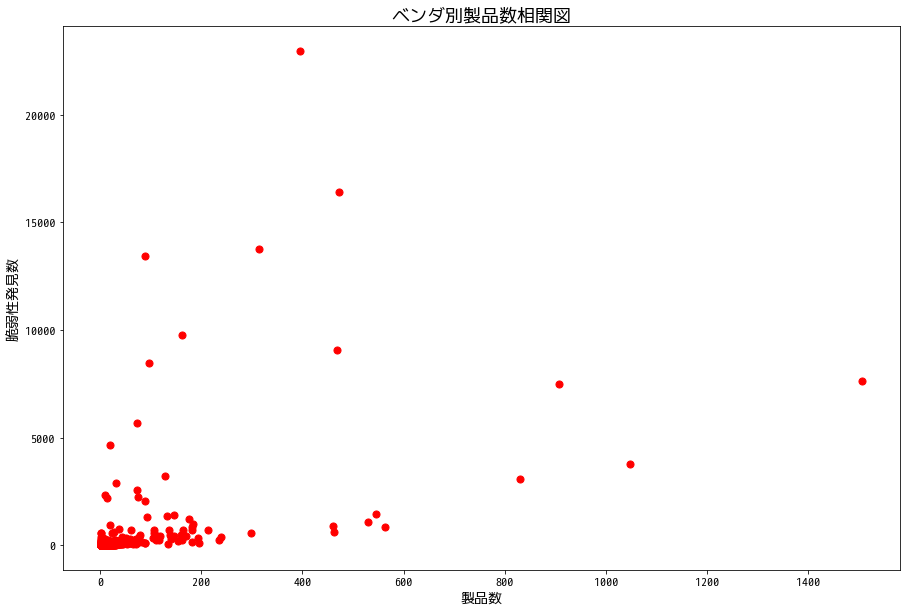

,pcnt,vcnt
vname,,
シスコシステムズ,1506,7626
ヒューレット・パッカード,1047,3751
IBM,908,7478
Huawei,830,3088
Lenovo,563,859
...,...,...
Sebastian Bergmann,1,2
pharmaguideline,1,1
best free giveaways project,1,1


In [6]:
%matplotlib inline
import matplotlib as ml
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2
from datetime import datetime

font = {'family' : 'VL Gothic'}
ml.rc('font', **font)
plt.rcParams['figure.figsize'] = 15.0,10.0

connection_config = {
    'host':     'localhost',
    'port':     '15432',
    'database': 'jvn_db',
    'user':     'jvn',  
    'password': 'jvn'
}

connection = psycopg2.connect(**connection_config)

stmt="""
select a.vname as vname, vcnt, pcnt
from
(
select  v.vid as vid, vname, count(p.pid) as pcnt
from   jvn_vendor v, jvn_product p
where  v.vid = p.vid
group  by v.vid, vname
) a,
(
select v.vid as vid, v.vname as vname, count(vd.cpe) as vcnt
from jvn_vendor v, jvn_product p, jvn_vulnerability_detail vd
where v.vid= p.vid
and   vd.cpe = p.cpe
group by v.vid, v.vname
) b
where a.vid = b.vid
order by pcnt desc
"""

report = pd.read_sql(sql=stmt, con=connection,index_col='vname')
pd.set_option("display.max_rows", 100)
connection.close()

x = report['pcnt']
y = report['vcnt']    
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x,y, c='red',s=50.0)

plt.title('ベンダ別製品数相関図', fontsize=18)
plt.tick_params(labelsize=12)
plt.xlabel('製品数', fontsize=14)
plt.ylabel('脆弱性発見数', fontsize=14)
plt.show()
    
report[['pcnt','vcnt']]